In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette="Set2")
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('bank_churn.txt')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.drop(['RowNumber','CustomerId','Surname'],axis = 1, inplace = True)

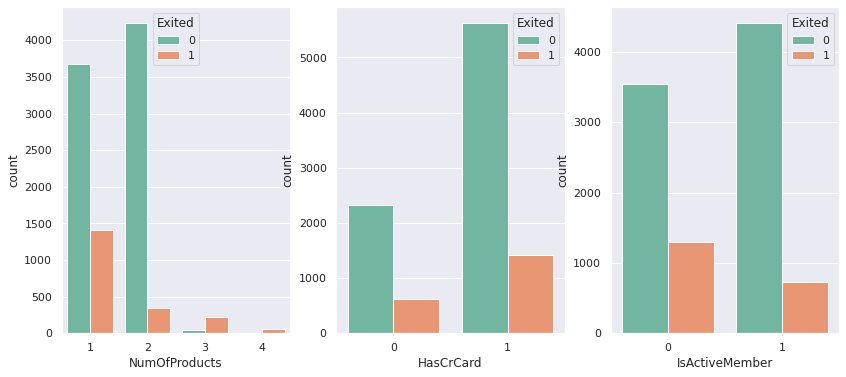

In [11]:
_,ax = plt.subplots(1,3,figsize=(18,6))
plt.subplots_adjust(0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = data, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = data, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = data, ax = ax[2])

KeyboardInterrupt: ignored

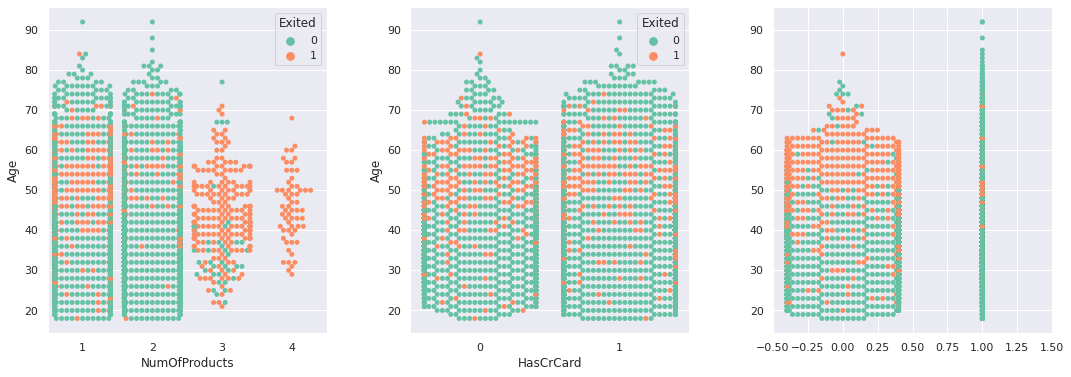

In [12]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = data, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = data, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = data, ax = ax[2])

In [14]:
encoder = LabelEncoder()
data["Geography"] = encoder.fit_transform(data["Geography"])
data["Gender"] = encoder.fit_transform(data["Gender"])

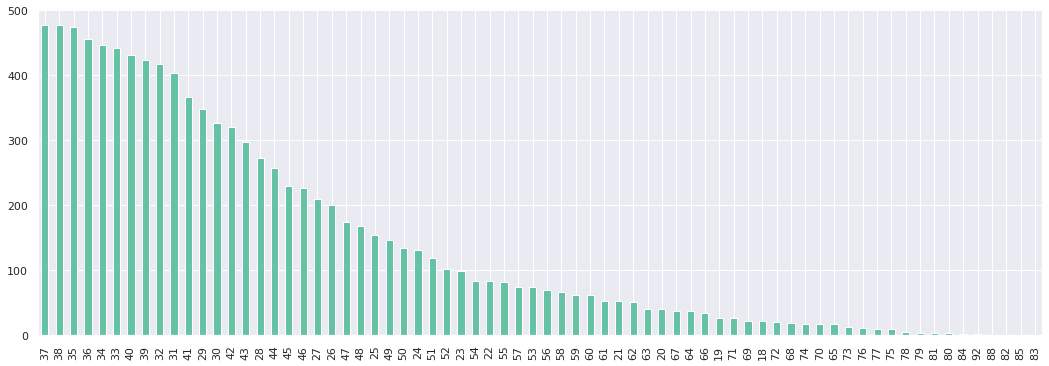

In [15]:
data['Age'].value_counts().plot.bar(figsize = (18,6))

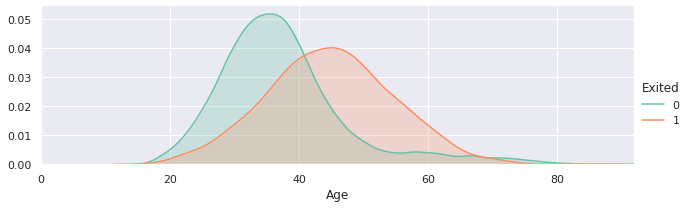

In [16]:
facet = sns.FacetGrid(data,hue = 'Exited',aspect = 3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data["Age"].max()))
facet.add_legend()
plt.show()

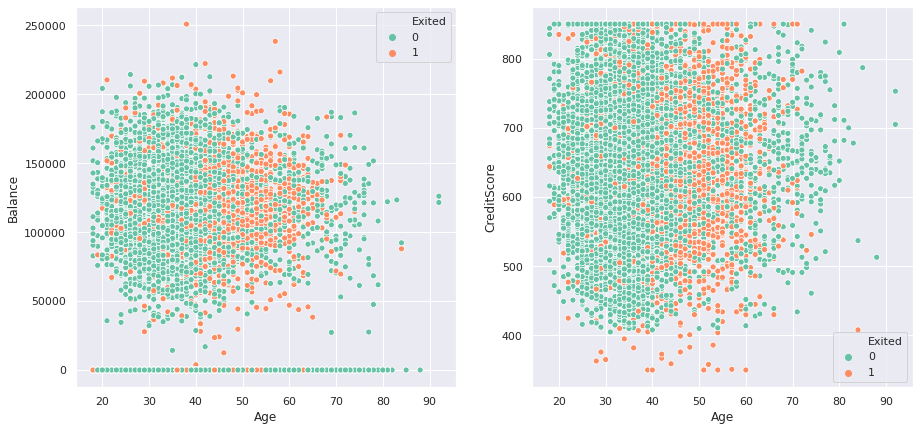

In [17]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data, ax=ax[1])

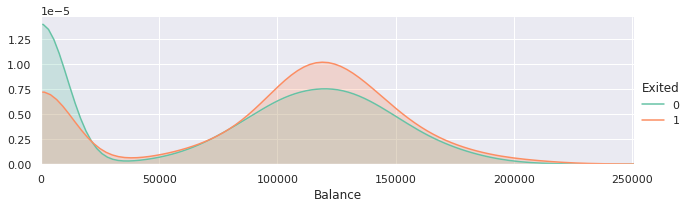

In [18]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, data["Balance"].max()))
facet.add_legend()

plt.show()

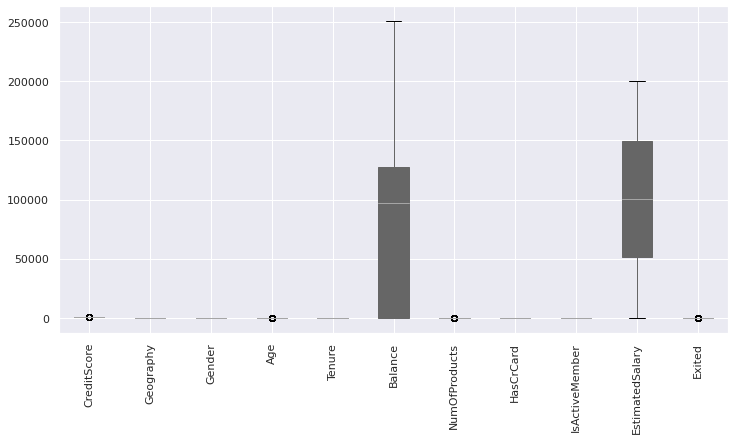

In [19]:
plt.figure(figsize=(12,6))
bplot = data.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

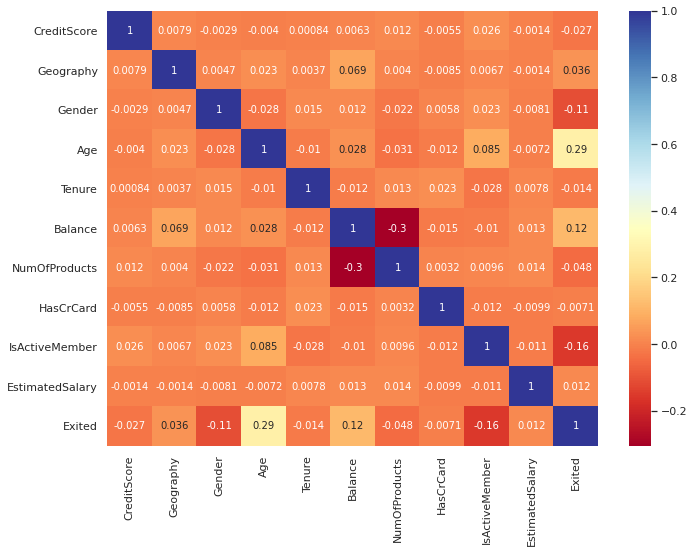

In [21]:
plt.figure(figsize=(11,8))
sns.heatmap(data.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [23]:
y = data["Exited"]
X = data.drop("Exited", axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)

In [25]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.784

In [26]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)
accuracy_score(y_test,y_pred)

0.789

In [27]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_pred, y_test)

0.789

In [28]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.864

In [30]:
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.8575

In [31]:
scaler = MinMaxScaler() 

bumpy_features = ["CreditScore", "Age", "Balance",'EstimatedSalary']

df_scaled = pd.DataFrame(data = X)
df_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])

In [32]:
df_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0,0,0.324324,2,0.000000,1,1,1,0.506735
1,0.516,2,0,0.310811,1,0.334031,1,0,1,0.562709
2,0.304,0,0,0.324324,8,0.636357,3,1,0,0.569654
3,0.698,0,0,0.283784,1,0.000000,2,0,0,0.469120
4,1.000,2,0,0.337838,2,0.500246,1,1,1,0.395400


In [33]:
X = df_scaled
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9020715630885122

In [36]:
confusion_matrix(y_test, y_pred)

array([[1463,  117],
       [ 195, 1411]])